In [1]:
library(magrittr)

In [2]:
source("../warming-levels/scripts/getGWL.R")

In [3]:
target <- "EC-EARTH"
modelfiles <- list.files("../datasets-aggregated-regionally/data/CMIP5/CMIP5_tas_landsea", 
                         full.names = TRUE,
                         pattern = target) %>% print()

[1] "../datasets-aggregated-regionally/data/CMIP5/CMIP5_tas_landsea/CMIP5_EC-EARTH_r12i1p1_historical.csv"
[2] "../datasets-aggregated-regionally/data/CMIP5/CMIP5_tas_landsea/CMIP5_EC-EARTH_r12i1p1_rcp26.csv"     
[3] "../datasets-aggregated-regionally/data/CMIP5/CMIP5_tas_landsea/CMIP5_EC-EARTH_r12i1p1_rcp45.csv"     
[4] "../datasets-aggregated-regionally/data/CMIP5/CMIP5_tas_landsea/CMIP5_EC-EARTH_r12i1p1_rcp85.csv"     


In [4]:
hist.regions <- grep("historical", modelfiles, value = TRUE) %>%
                read.table(header = TRUE, sep = ",", dec = ".", comment.char = "#") 
str(hist.regions)

'data.frame':	1872 obs. of  60 variables:
 $ date : Factor w/ 1872 levels "1850-01","1850-02",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ GIC  : num  -23.4 -23.8 -23.1 -17.5 -10.8 ...
 $ NWN  : num  -19.77 -19.2 -20.02 -9.23 -2.17 ...
 $ NEN  : num  -27.88 -27.58 -21.15 -12.95 -4.83 ...
 $ WNA  : num  -3.5 -1.19 -1.94 2.88 9.27 ...
 $ CNA  : num  -3.256 -0.767 1.275 8.376 14.322 ...
 $ ENA  : num  2.38 1.86 5.24 8.99 13.58 ...
 $ NCA  : num  12.8 13.6 14.5 18.8 20.3 ...
 $ SCA  : num  22.6 22.6 23.8 24.1 23.4 ...
 $ CAR  : num  22.4 22.1 22.7 22.8 23.3 ...
 $ NWS  : num  19.5 20.1 19.8 19.6 18.7 ...
 $ NSA  : num  21.7 22.4 22.2 22.1 21.2 ...
 $ NES  : num  21.9 21.8 21.7 21.6 21.2 ...
 $ SAM  : num  20 20.1 19.4 19.3 18.7 ...
 $ SWS  : num  15 15.7 14.8 14.2 12 ...
 $ SES  : num  22.1 22 20.6 19.4 15.7 ...
 $ SSA  : num  12.24 13.27 10.96 9.89 7.44 ...
 $ NEU  : num  -0.885 -1.989 -0.688 3.378 5.005 ...
 $ WCE  : num  -1.787 -0.202 3.175 6.775 11.896 ...
 $ EEU  : num  -13.17 -8.55 -2.09 1.8 12.3

In [5]:
yrs <- hist.regions[["date"]] %>% gsub("-.*", "", .)
hist <- tapply(hist.regions[["world"]], INDEX = yrs, FUN = "mean", na.rm = TRUE)
names(hist) <- unique(yrs)

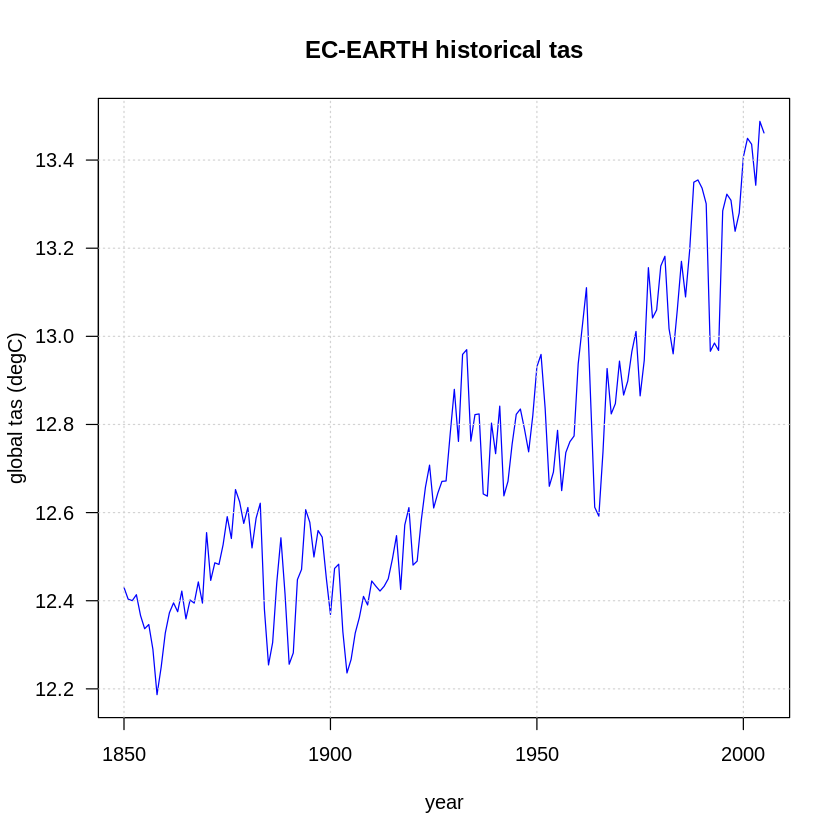

In [6]:
plot(x = as.integer(names(hist)),
     y = hist, 
     ylab = "global tas (degC)", xlab = "year",
     type = "l", col = "blue", las = 1)
grid()
title(paste(target, "historical tas"))


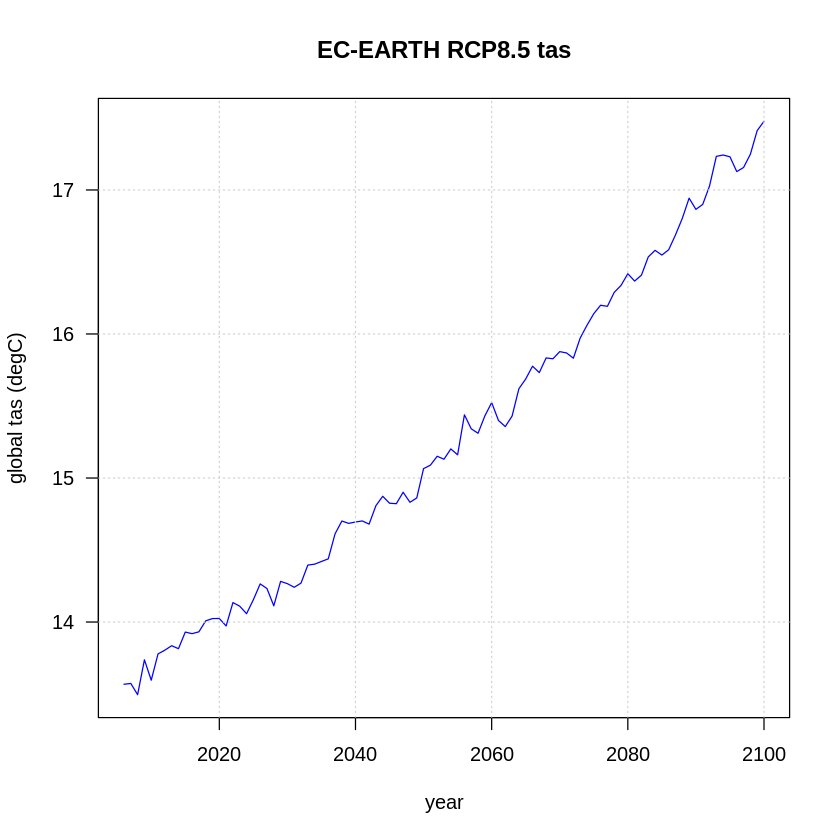

In [7]:
rcp85.regions <- grep("rcp85", modelfiles, value = TRUE) %>% 
                 read.table(header = TRUE, sep = ",", dec = ".", comment.char = "#")
yrs <- rcp85.regions[["date"]] %>% gsub("-.*", "", .)
rcp85 <- tapply(rcp85.regions[["world"]], INDEX = yrs, FUN = "mean", na.rm = TRUE)
names(rcp85) <- unique(yrs)

plot(x = as.integer(names(rcp85)),
     y = rcp85, 
     ylab = "global tas (degC)", xlab = "year",
     type = "l", col = "blue", las = 1)
grid()
title(paste(target, "RCP8.5 tas"))

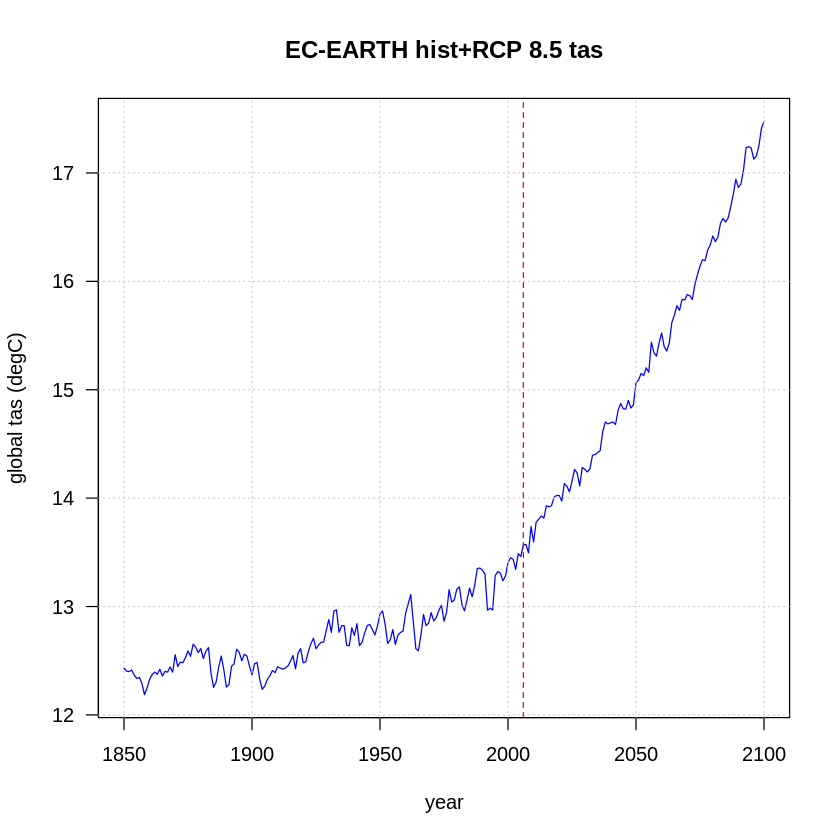

In [8]:
tas <- append(hist, rcp85)
plot(x = as.integer(names(tas)),
     y = tas, 
     ylab = "global tas (degC)", xlab = "year",
     type = "l", col = "blue", las = 1)
grid()
abline(v = 2006, col = "red", lty = 2)
title(paste(target, "hist+RCP 8.5 tas"))

In [9]:
 gwl_1.5 <- getGWL(data = tas, 
                   base.period = c(1850, 1900),
                   proj.period = c(1971, 2100),
                   window = 20,
                   GWL = 1.5) %>% print()

[1] 2018
attr(,"interval")
[1] 2009 2028


In [10]:
gwl_1.5

[1] 2018
attr(,"interval")
[1] 2009 2028

In [11]:
attr(gwl_1.5, "interval")

[1] 2009 2028

In [12]:
gwls <- c(1.5, 2, 3, 4)
central.years <- c()
for (i in 1:length(gwls)) {
    central.years[i] <- getGWL(data = tas, 
                               base.period = c(1850, 1900),
                               proj.period = c(1971, 2100),
                               window = 20,
                               GWL = gwls[i]) 
}

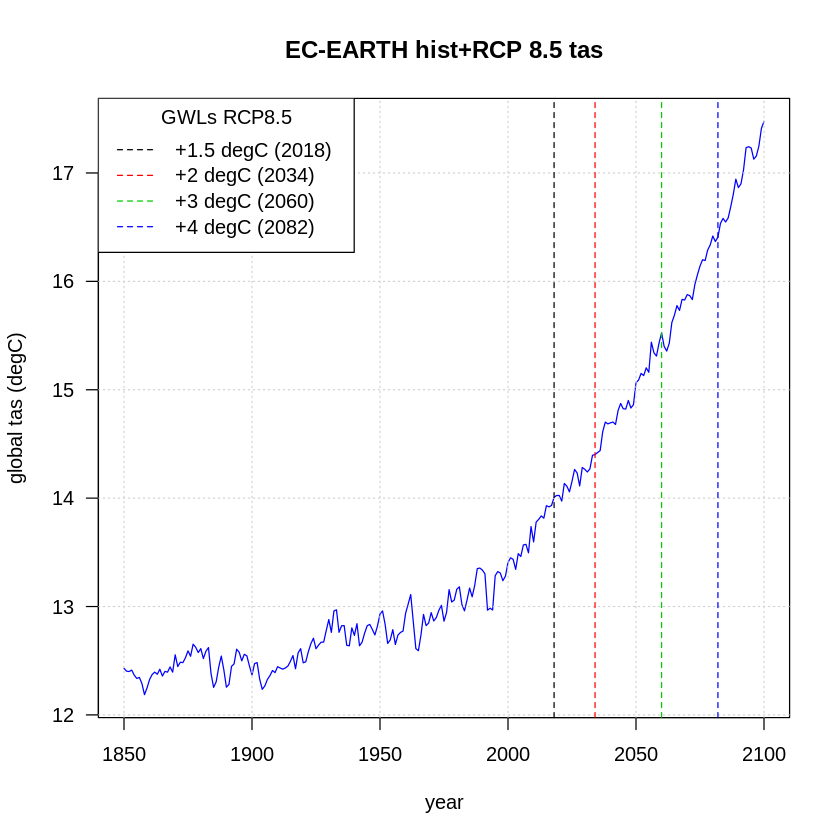

In [13]:
plot(x = as.integer(names(tas)),
     y = tas, 
     ylab = "global tas (degC)", xlab = "year",
     type = "l", col = "blue", las = 1)
grid()
title(paste(target, "hist+RCP 8.5 tas"))

## Indicate GWLs as vertical lines
colors <- 1:length(gwls)
line.type <- "dashed"
abline(v = central.years, col = colors, lty = line.type)
legend("topleft",title = "GWLs RCP8.5",
       paste0("+", gwls, " degC (", central.years, ")"),
       lty = line.type, col = colors)

In [14]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 22.04.1 LTS

Matrix products: default
BLAS/LAPACK: /home/phanaur/mambaforge/envs/tfg/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=es_ES.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=es_ES.UTF-8        LC_COLLATE=es_ES.UTF-8    
 [5] LC_MONETARY=es_ES.UTF-8    LC_MESSAGES=es_ES.UTF-8   
 [7] LC_PAPER=es_ES.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=es_ES.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] magrittr_2.0.1

loaded via a namespace (and not attached):
 [1] fansi_0.4.2       digest_0.6.27     utf8_1.2.1        crayon_1.4.1     
 [5] IRdisplay_1.0     repr_1.1.3        lifecycle_1.0.0   jsonlite_1.7.2   
 [9] evaluate_0.14     pillar_1.6.1      rlang_0.4.11      uuid_0.1-4       
[13] vctrs_0